This notebook is the illustration to the work https://arxiv.org/abs/2407.04852

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv,yv,gamma
from mpmath import *
mp.pretty = True

We introduce the definitions of special function solutions.

In [3]:
def f(n,x,d1,d2):
  return d1*jv(n,x)+d2*yv(n,x)
def M(n, x, alpha,d1,d2):
  M=np.zeros((n,n),dtype=complex);
  for i in range(n):
    for j in range(n):
      M[i,j]=f(alpha/2+i-j,x,d1,d2)
  return M
def tau(n, x, alpha,d1,d2):
  return np.linalg.det(M(n,x,alpha,d1,d2))
def u(n, x, alpha,d1,d2):
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)


We produce the grid on the complex plane.

In [ ]:
x = np.linspace(-20, 20, 400) # Real domain.
y = np.linspace(-20, 20, 400) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y
N=len(x);

We introduce the function to evaluate the complex phases of the function on the grid in the complex plane.

In [ ]:
def U(n,alpha,d1,d2):
  U=np.zeros((N,N),dtype=complex);
  for i in range(N):
    for j in range(N):
      U[i,j]=np.angle(u(n, Z[i,j], alpha,d1,d2))
  return U

Illustration of colors

Text(0, 0.5, 'Im(x)')

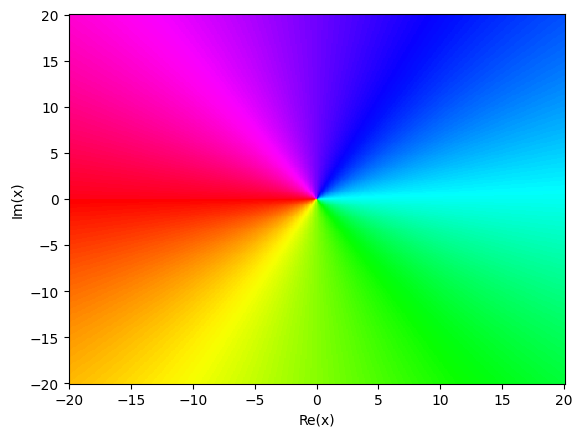

In [ ]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,np.angle(Z),vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small alpha large n.

Text(0, 0.5, 'Im(x)')

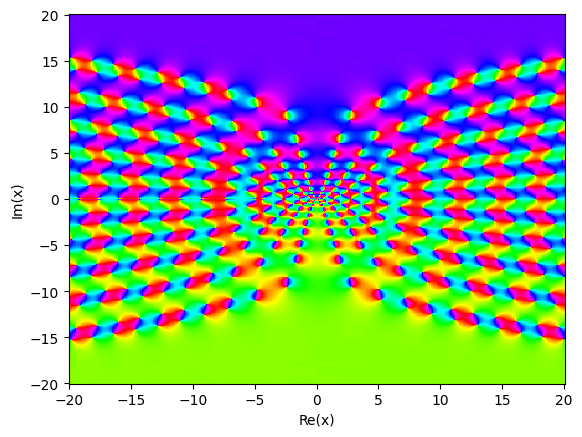

In [ ]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,25/27,55/100,71/100).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small alpha, large n, d2=0.

Text(0, 0.5, 'Im(x)')

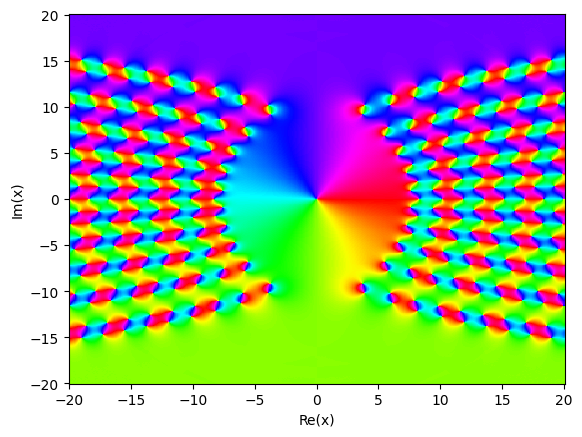

In [ ]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,25/27,55/100,0).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

In [ ]:
x = np.linspace(-30, 30, 600) # Real domain.
y = np.linspace(-30, 30, 600) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y
N=len(x);

Large n, large alpha

<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: overflow encountered in scalar multiply
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: invalid value encountered in scalar multiply
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)


Text(0, 0.5, 'Im(x)')

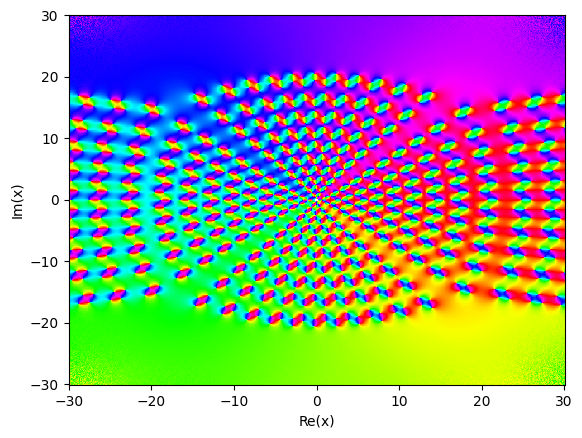

In [ ]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,576/25,55/100,71/100).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

Small n, large alpha.

In [ ]:
x = np.linspace(-50, 50, 1000) # Real domain.
y = np.linspace(-50, 50, 1000) # Imaginary domain.
X, Y = np.meshgrid(x, y) # Make grid matrices.
Z = X + 1j*Y
N=len(x);

<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: overflow encountered in scalar multiply
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: invalid value encountered in scalar divide
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: invalid value encountered in scalar multiply
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-49-9e11a86bd302>:12: RuntimeWarning: overflow encountered in scalar divide
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)


Text(0, 0.5, 'Im(x)')

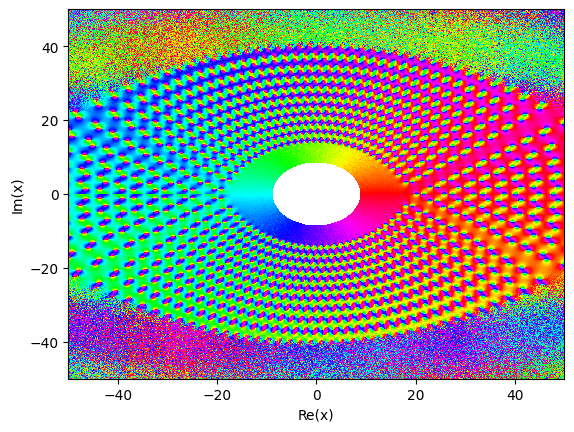

In [ ]:
fig, axs = plt.subplots()
plt.hsv()
plt.pcolormesh(X,Y,U(10,2001/25,55/100,71/100).real,vmin=-np.pi,vmax=np.pi)
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

We introduce coefficients appearing in the asymptotics.

Determinant at infinity

In [ ]:
def Codd(n,d1,d2):
  return np.power(-1,(n - 1)/2)*np.power((np.square(d1) + np.square(d2))/(2*np.pi),n/2)*np.power(4,(np.square(n) + 1)/
    4)*(barnesg((n + 1)/2))*(barnesg((n + 3)/2))

def Ceven(n,d1,d2):
  return np.power((np.square(d1) + np.square(d2))/(2*np.pi),n/2)*np.power(4,np.square(n)/
    4)*np.square(barnesg(n/2 + 1))

Determinant at zero

In [ ]:
def Ca(alpha,n,j,d1,d2):
  return np.power(-1,(n - 1)*n/2 + n*j + n - j)*np.power(d2/np.pi,n)*np.power(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2),j)\
  *barnesg(n-j+1)*barnesg(n-j+1-alpha/2)*barnesg(j+1)*barnesg(j+1+alpha/2)/barnesg(n-j*2+1-alpha/2)\
  /barnesg(-n+2*j+1+alpha/2)*np.power(2,alpha*n/2-j*(alpha-2*n+2*j))

Solution at zero

In [6]:

def r(alpha,n,j,d1,d2):
  return np.power(-1,n)*np.power(2,2*n-4*j-alpha+1)*(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2))\
  *np.square(gamma(-alpha/2+n-2*j+1))/gamma(n-j-alpha/2+1)/gamma(n-j+1)*gamma(alpha/2+j)\
  /np.square(gamma(alpha/2-n+2*j))*gamma(j+1)

def s(alpha,n,j,d1,d2):
  return np.power(-1,n)*np.power(2,-2*n+4*j+alpha-1)/(d1/d2*sin(np.pi*alpha/2)+cos(np.pi*alpha/2))\
  *np.square(gamma(alpha/2-n+2*j+1))*gamma(n-j-alpha/2+1)*gamma(n-j)*gamma(alpha/2+j+1)\
  /np.square(gamma(-alpha/2+n-2*j))/gamma(j+1)

In [23]:
x = np.linspace(1e-6, 1e-3, 1000) # Real domain.
N=len(x);

We compute the solution on the grid on the real line.

In [15]:
def UR(n,alpha,d1,d2):
  UR=np.zeros(N);
  for i in range(N):
    UR[i]=u(n, x[i], alpha,d1,d2)
  return UR
def TAUR(n,alpha,d1,d2):
  TAUR=np.zeros(N);
  for i in range(N):
    TAUR[i]=tau(n, x[i], alpha,d1,d2)
  return TAUR

/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
<ipython-input-19-3586891d356a>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  TAUR[i]=tau(n, x[i], alpha,d1,d2)


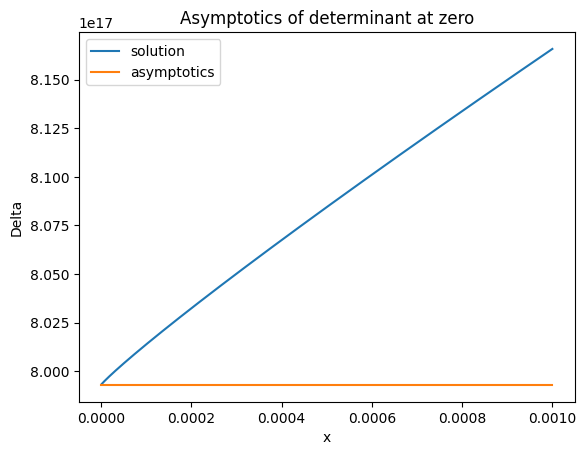

In [27]:
plt.plot(x, np.power(x,50)*TAUR(10,1.08,0.55,0.71),label="solution")
plt.plot(x, np.full(N, Ca(1.08,10,5,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('Delta')
plt.title('Asymptotics of determinant at zero')
plt.legend()

In [5]:
x = np.linspace(200, 1000, 1000) # Real domain.
N=len(x);

<ipython-input-4-3586891d356a>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  TAUR[i]=tau(n, x[i], alpha,d1,d2)


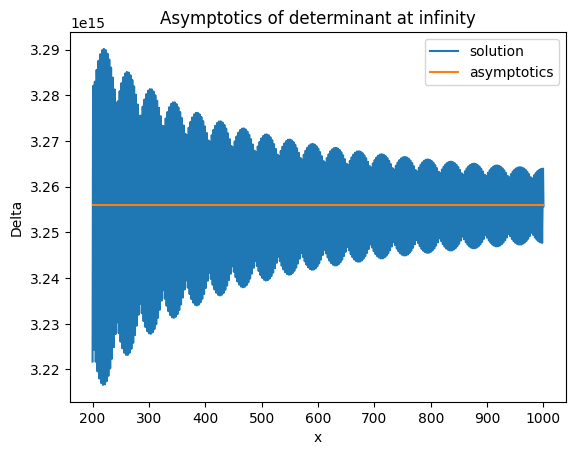

In [8]:
plt.plot(x, np.power(x,25)*TAUR(10,1.08,0.55,0.71),label="solution")
plt.plot(x, np.full(N, Ceven(10,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('Delta')
plt.title('Asymptotics of determinant at infinity')
plt.legend()

In [18]:
x = np.linspace(1e-3, 1e-2, 1000) # Real domain.
N=len(x);

<ipython-input-3-9e11a86bd302>:12: RuntimeWarning: overflow encountered in scalar multiply
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-3-9e11a86bd302>:12: RuntimeWarning: invalid value encountered in scalar divide
  return -tau(n+1, x, alpha-2,d1,d2)*tau(n, x, alpha,d1,d2)/tau(n+1, x, alpha,d1,d2)/tau(n, x, alpha-2,d1,d2)
<ipython-input-15-3586891d356a>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  UR[i]=u(n, x[i], alpha,d1,d2)


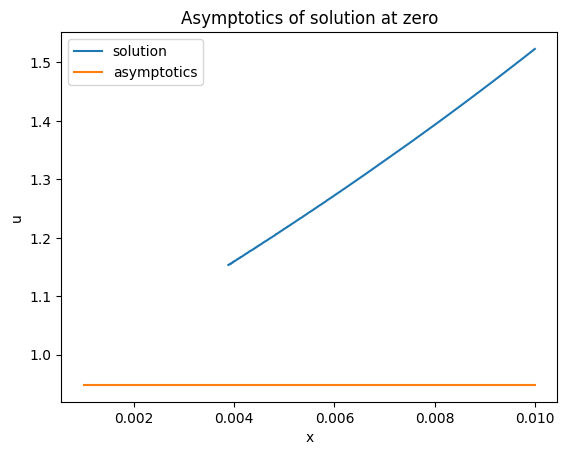

In [24]:
plt.plot(x, 1/np.power(x,0.08)*UR(10,1.08,0.55,0.71),label="solution")
plt.plot(x, np.full(N, r(1.08,10,5,0.55,0.71)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Asymptotics of solution at zero')
plt.legend()

In [32]:
x = np.linspace(200, 210, 1000) # Real domain.
N=len(x);

<ipython-input-15-3586891d356a>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  UR[i]=u(n, x[i], alpha,d1,d2)


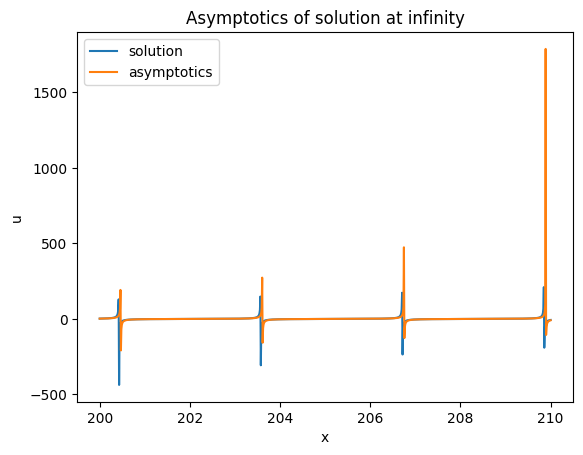

In [33]:
plt.plot(x, UR(10,1.08,0.55,0.71),label="solution")
plt.plot(x, -1/np.tan(x-np.angle(0.55+1j*0.71)+np.pi/4*(11-1.08)),label="asymptotics")
plt.xlabel('x')
plt.ylabel('u')
plt.title('Asymptotics of solution at infinity')
plt.legend()